# Plots that are relevant for the report
- Since the data for 2 of the plots are in the "TOO MUCH" file, i will not include them here, but mention that in the report

In [22]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

### July 2023 values in hourly time step

In [23]:
# ___________________________precipitation_______________________________

# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_precip(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
precipitation_data = pd.read_csv('precipitation_data_july.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
precipitation_data['Nedbør (mm)'] = precipitation_data['Nedbør (mm)'].apply(clean_precip)

precipitation_data = precipitation_data[precipitation_data['Nedbør (mm)'] != -10000000000]

time_prec = pd.to_datetime(precipitation_data['Tidspunkt'])

#precipitation_data.head()

precipitation_data['Tidspunkt'] = pd.to_datetime(precipitation_data['Tidspunkt'])
# Set 'Tidspunkt' column as index
precipitation_data.set_index('Tidspunkt', inplace=True)


liter_on_roof = precipitation_data["Nedbør (mm)"] * 700 # 1 mm = 1 liter onf 1 m^2, roof is 700 m^2
ls_on_roof = liter_on_roof

# ___________________________discharge_______________________________

# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_dis(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
discharge_data = pd.read_csv('discharge_data_july.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
discharge_data['Vannføring (m³/s)'] = discharge_data['Vannføring (m³/s)'].apply(clean_dis)

time_dis = pd.to_datetime(discharge_data['Tidspunkt'])

#discharge_data.head()

discharge_data['Tidspunkt'] = pd.to_datetime(discharge_data['Tidspunkt'])
# Set 'Tidspunkt' column as index
discharge_data.set_index('Tidspunkt', inplace=True)

---

### Scatterplot with regression line
- This shows how the values are correlating to each other on a daily basis in July 2023 (bad)

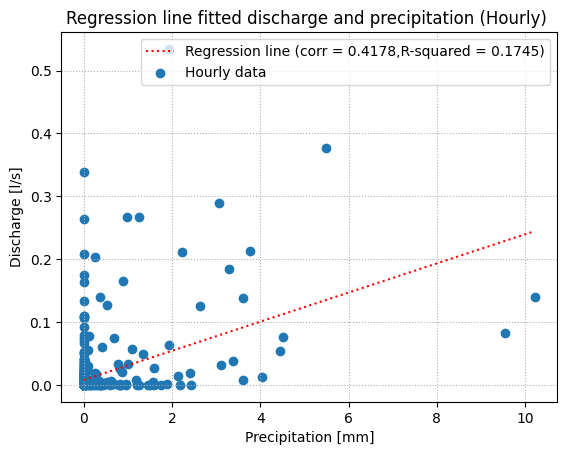

In [24]:
import statsmodels.formula.api as smf 

# July 2023
start_date = '2023-07-01'
end_date = '2023-07-31'

slice_july_dis = discharge_data.loc[start_date:end_date]
slice_july_prec = precipitation_data.loc[start_date:end_date]

# Reset index so that it is possible to combine the two datasets
slice_july_dis.reset_index(inplace=True)
slice_july_prec.reset_index(inplace=True)

# using the slicing
july_dis = slice_july_dis['Vannføring (m³/s)']
july_prec = slice_july_prec['Nedbør (mm)']

combined_data = pd.concat([july_dis*1000, july_prec], axis=1) # combining them so that we can use smf.ols and scatter plot
combined_data.columns = ['Discharge', 'Precipitation'] # Renaming the columns

# linfit the discharge and precipitation
linfit_july = smf.ols(formula='Discharge ~ Precipitation', data=combined_data).fit()
intercept_july, slope_july = linfit_july.params

# correlating the data to see if it is good or bad correlation for houurly data during july
corr_dis_prec = combined_data['Discharge'].corr(combined_data['Precipitation'])

plt.plot([july_prec.min(), july_prec.max()],
          [intercept_july + slope_july*july_prec.min(), intercept_july + slope_july*july_prec.max()]
          , 'r:', label=f'Regression line (corr = {corr_dis_prec:.4f},R-squared = {linfit_july.rsquared:.4f})') # adding the rsquared aswell
plt.scatter(combined_data['Precipitation'], combined_data['Discharge'], label = "Hourly data")
plt.ylabel('Discharge [l/s]')
plt.xlabel('Precipitation [mm]')
plt.title('Regression line fitted discharge and precipitation (Hourly) ')
plt.grid(linestyle=':')
plt.legend()
plt.show()

- Two other plots in the report which are for all the years but for daily and monthly data, which correlates better the larger time step.

---

### Cumulative sum of discharge and precipitation for July 2023

In [25]:
# ___________________________precipitation_______________________________
import pandas as pd
import matplotlib.pyplot as plt
# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_precip(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
precipitation_data_all = pd.read_csv('precipitation_data_july.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
precipitation_data_all['Nedbør (mm)'] = precipitation_data_all['Nedbør (mm)'].apply(clean_precip)

# ___________________________discharge_______________________________

# Function to replace commas with periods, remove tabs, and convert scientific notation properly
def clean_dis(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
discharge_data_all = pd.read_csv('discharge_data_july.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
discharge_data_all['Vannføring (m³/s)'] = discharge_data_all['Vannføring (m³/s)'].apply(clean_dis)

# ____________________________visualize data______________________________

mean_all_dis = discharge_data_all['Vannføring (m³/s)'].mean()
print(f"Mean discharge for all data: {mean_all_dis:.6f} m^3/s")
print(f"Mean discharge for all data: {(mean_all_dis)*1000:.6f} l/s")
print()
mean_all_prec = precipitation_data_all['Nedbør (mm)'].mean()
print(f"Mean precipitation for all data: {mean_all_prec:.6f} mm")

Mean discharge for all data: 0.000011 m^3/s
Mean discharge for all data: 0.011086 l/s

Mean precipitation for all data: 0.152995 mm


In [26]:
# Convert 'Tidspunkt' to datetime if not already done
precipitation_data_all['Tidspunkt'] = pd.to_datetime(precipitation_data_all['Tidspunkt'])

# Filter for July data
july_prec_data = precipitation_data_all[precipitation_data_all['Tidspunkt'].dt.month == 7]

In [27]:
# Convert 'Tidspunkt' to datetime
discharge_data_all['Tidspunkt'] = pd.to_datetime(discharge_data_all['Tidspunkt'])

# Filter for July data
july_discharge_data = discharge_data_all[discharge_data_all['Tidspunkt'].dt.month == 7]

In [28]:
# Precipitation
july_prec_data.loc[:, "liter"] = july_prec_data["Nedbør (mm)"] * 700  # 700 m^2 is the area of the roof
july_prec_data.loc[:, "cumsum"] = july_prec_data["liter"].cumsum()

july_discharge_data.loc[:, "m3"] = july_discharge_data["Vannføring (m³/s)"] * 3600  # 3600 seconds in an hour
july_discharge_data.loc[:, "liter"] = july_discharge_data["m3"] * 1000  # 1000 liters in a cubic meter

# Make a new column that is the cumulative sum
july_discharge_data.loc[:, "cumsum_liter"] = july_discharge_data["liter"].cumsum()


/var/folders/lt/vstv3ntd1hd5lgtj7q0_yfmm0000gn/T/ipykernel_69746/2622924755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_prec_data.loc[:, "liter"] = july_prec_data["Nedbør (mm)"] * 700  # 700 m^2 is the area of the roof
/var/folders/lt/vstv3ntd1hd5lgtj7q0_yfmm0000gn/T/ipykernel_69746/2622924755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_prec_data.loc[:, "cumsum"] = july_prec_data["liter"].cumsum()
/var/folders/lt/vstv3ntd1hd5lgtj7q0_yfmm0000gn/T/ipykernel_69746/2622924755.py:5: Set

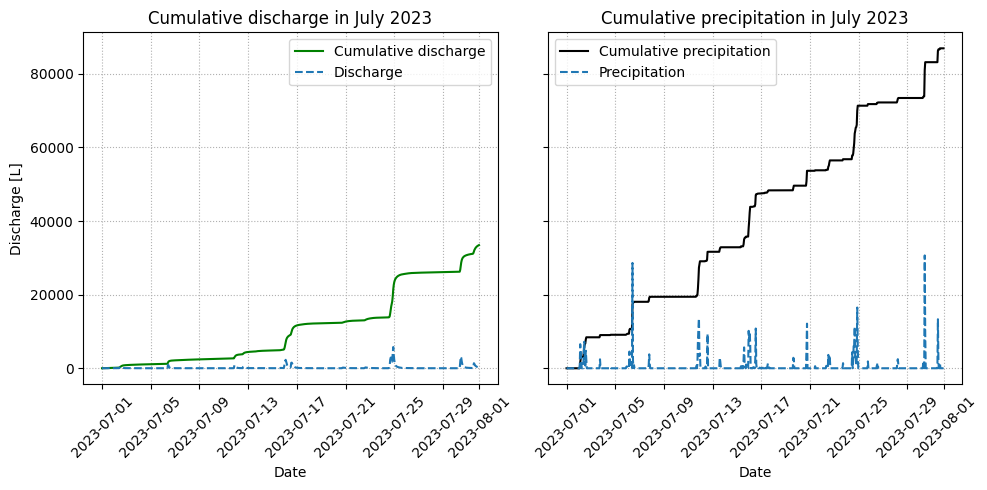

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].plot(july_discharge_data["Tidspunkt"], july_discharge_data["cumsum_liter"], label="Cumulative discharge", color="green")
ax[0].plot(july_discharge_data["Tidspunkt"], july_discharge_data["m3"]*3000, linestyle="--", label="Discharge")
ax[0].set_title("Cumulative discharge in July 2023")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Discharge [L]")
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(linestyle=":")
ax[0].legend()

ax[1].plot(july_prec_data["Tidspunkt"], july_prec_data["cumsum"], label="Cumulative precipitation", color="black")
ax[1].plot(july_prec_data["Tidspunkt"],july_prec_data["Nedbør (mm)"]*3000, linestyle="--", label="Precipitation")
ax[1].set_title("Cumulative precipitation in July 2023")
ax[1].set_xlabel("Date")
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(linestyle=":")
ax[1].legend()

plt.tight_layout()
plt.show()



In [30]:
# Basic evaporation model
# The evaporation is calculated as the difference between the precipitation and the discharge (E = P - Q)

endprod_groof = july_discharge_data["cumsum_liter"].max() 
endprod_nroof = july_prec_data["cumsum"].max()

print("E = P - Q")
print(f'P: The cumulative discharge from the "normal roof" is {endprod_nroof:.2f} liters (which is also the precipitation)')
print(f'Q: The cumulative discharge from the "green roof" is {endprod_groof:.2f} liters')
print()
print(f'E: The amount of evaporated water from the "green roof" is {endprod_nroof - endprod_groof:.2f} liters')
print()

fraction_evap = (endprod_groof / endprod_nroof)
print(f'The precentage of precipitation that ended up as discharge: {fraction_evap:.2f} or {fraction_evap*100:.2f}%')

E = P - Q
P: The cumulative discharge from the "normal roof" is 86940.00 liters (which is also the precipitation)
Q: The cumulative discharge from the "green roof" is 33472.23 liters

E: The amount of evaporated water from the "green roof" is 53467.76 liters

The precentage of precipitation that ended up as discharge: 0.39 or 38.50%


- At the end of the month, we are dealing with values of 9 for the green roof, and 35 for the "normal roof". 9/35 = 0.25, which tells us that 75% of the water has been evaporated or/and retaiained. In this case worinking with one month in july, there is a lot of evaportanspiration. 
    - Here is a very simple way of calculating evaporation:

$$ \frac{\Delta S}{\Delta t} = P - E - Q $$

The change is storage is suupsed to be 0 for a longer period (maybe longer than the month), and therefore we can calculate a very simple evaporation from precipitation and discharge alone:

$$ \underline{E = P-Q} $$

- There is also the fact that since some stuff is retained in the soil for a bit, not all of the water has run out of the system yet, but i don't know if that is important for this.

---

### Seasonal decompose

#### Discharge

In [31]:
def clean_dis(value):
    if isinstance(value, str):
        return float(value.replace(',', '.').replace('\t', ''))
    return value

# Read the CSV file, skip the first row, and use the second row as the header
discharge_data_all = pd.read_csv('discharge_data_all_daily.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
discharge_data_all['Vannføring (m³/s)'] = discharge_data_all['Vannføring (m³/s)'].apply(clean_dis)
# Convert 'Tidspunkt' to datetime
discharge_data_all['Tidspunkt'] = pd.to_datetime(discharge_data_all['Tidspunkt'])

In [32]:
#discharge_data_all['Vannføring (m³/s)'].fillna(method='ffill', inplace=True)
discharge_data_all['Vannføring (m³/s)'] = discharge_data_all['Vannføring (m³/s)'].ffill()

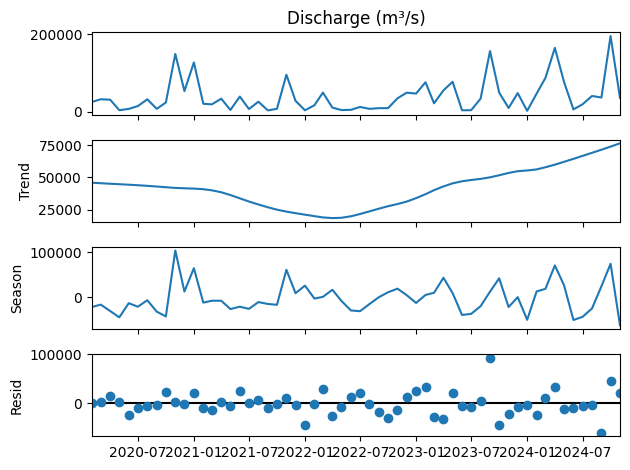

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

discharge_data_month = discharge_data_all.resample('ME', on='Tidspunkt').sum()
discharge_data_week = discharge_data_all.resample('D', on='Tidspunkt').sum().interpolate()[::7]

discharge_data_month.rename(columns={'Vannføring (m³/s)': 'Discharge (m³/s)'}, inplace=True)
discharge_data_week.rename(columns={'Vannføring (m³/s)': 'Discharge (m³/s)'}, inplace=True)

discharge_data_month['Discharge (m³/s)'] = discharge_data_month['Discharge (m³/s)']*1000 * 60*60*24 #*31
discharge_data_week['Discharge (m³/s)'] = discharge_data_week['Discharge (m³/s)']*1000 * 60*60*24


seasonal_dis_month = seasonal_decompose(discharge_data_month['Discharge (m³/s)'], model='additive', period=12)#.plot()
seasonal_dis_week = seasonal_decompose(discharge_data_week['Discharge (m³/s)'], model='additive', period=51)#.plot()

# doing it with STL
stl_month = STL(discharge_data_month['Discharge (m³/s)'], seasonal=13)
res_month = stl_month.fit()
fig_month = res_month.plot()

plt.show()

In [34]:
"""
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

stl_month = STL(discharge_data_month['Discharge (m³/s)'], seasonal=13)
res_month = stl_month.fit()

# create the figure and axis objects
fig_month, ax_month = plt.subplots(figsize=(12, 5))

# plot the decomposed components with customizations
ax_month.plot(discharge_data_month.index, res_month.seasonal, label='Seasonal', color='blue')
ax_month.plot(discharge_data_month.index, res_month.trend, label='Trend', color='red')
ax_month.plot(discharge_data_month.index, res_month.resid, label='Residual', color='green')

ax_month.set_title("Monthly Discharge Data")
ax_month.set_xlabel("Time")
ax_month.set_ylabel("Discharge (m³/s)")
ax_month.grid(True)

# display the plot
plt.legend()
plt.show()
"""


'\nimport matplotlib.pyplot as plt\nfrom statsmodels.tsa.seasonal import STL\n\nstl_month = STL(discharge_data_month[\'Discharge (m³/s)\'], seasonal=13)\nres_month = stl_month.fit()\n\n# create the figure and axis objects\nfig_month, ax_month = plt.subplots(figsize=(12, 5))\n\n# plot the decomposed components with customizations\nax_month.plot(discharge_data_month.index, res_month.seasonal, label=\'Seasonal\', color=\'blue\')\nax_month.plot(discharge_data_month.index, res_month.trend, label=\'Trend\', color=\'red\')\nax_month.plot(discharge_data_month.index, res_month.resid, label=\'Residual\', color=\'green\')\n\nax_month.set_title("Monthly Discharge Data")\nax_month.set_xlabel("Time")\nax_month.set_ylabel("Discharge (m³/s)")\nax_month.grid(True)\n\n# display the plot\nplt.legend()\nplt.show()\n'

#### Precipitation

In [35]:
# Read the CSV file, skip the first row, and use the second row as the header
precipitation_data_all = pd.read_csv('precipitation_data_all_daily.csv', sep=';', skiprows=1, header=0)

# Clean the "Vannføring (m³/s)" column
precipitation_data_all['Nedbør (mm)'] = precipitation_data_all['Nedbør (mm)'].apply(clean_dis)

precipitation_data_all = precipitation_data_all[precipitation_data_all['Nedbør (mm)'] != -10000000000]

# Convert 'Tidspunkt' to datetime
precipitation_data_all['Tidspunkt'] = pd.to_datetime(precipitation_data_all['Tidspunkt'])

In [36]:
precip_data_month = precipitation_data_all.resample('ME', on='Tidspunkt').sum()
precip_data_week = precipitation_data_all.resample('D', on='Tidspunkt').sum().interpolate()[::7]

precip_data_month.rename(columns={'Nedbør (mm)': 'Precipitation (mm)'}, inplace=True)
precip_data_week.rename(columns={'Nedbør (mm)': 'Precipitation (mm)'}, inplace=True)

precip_data_month['Precipitation (mm)'] = precip_data_month['Precipitation (mm)'] * 700
precip_data_week['Precipitation (mm)'] = precip_data_week['Precipitation (mm)'] * 700

seasonal_prec_month = seasonal_decompose(precip_data_month['Precipitation (mm)'], model='additive', period=12)#.plot()
seasonal_prec_week = seasonal_decompose(precip_data_week['Precipitation (mm)'], model='additive', period=51)#.plot()

### Combined seasonal decomposition plot

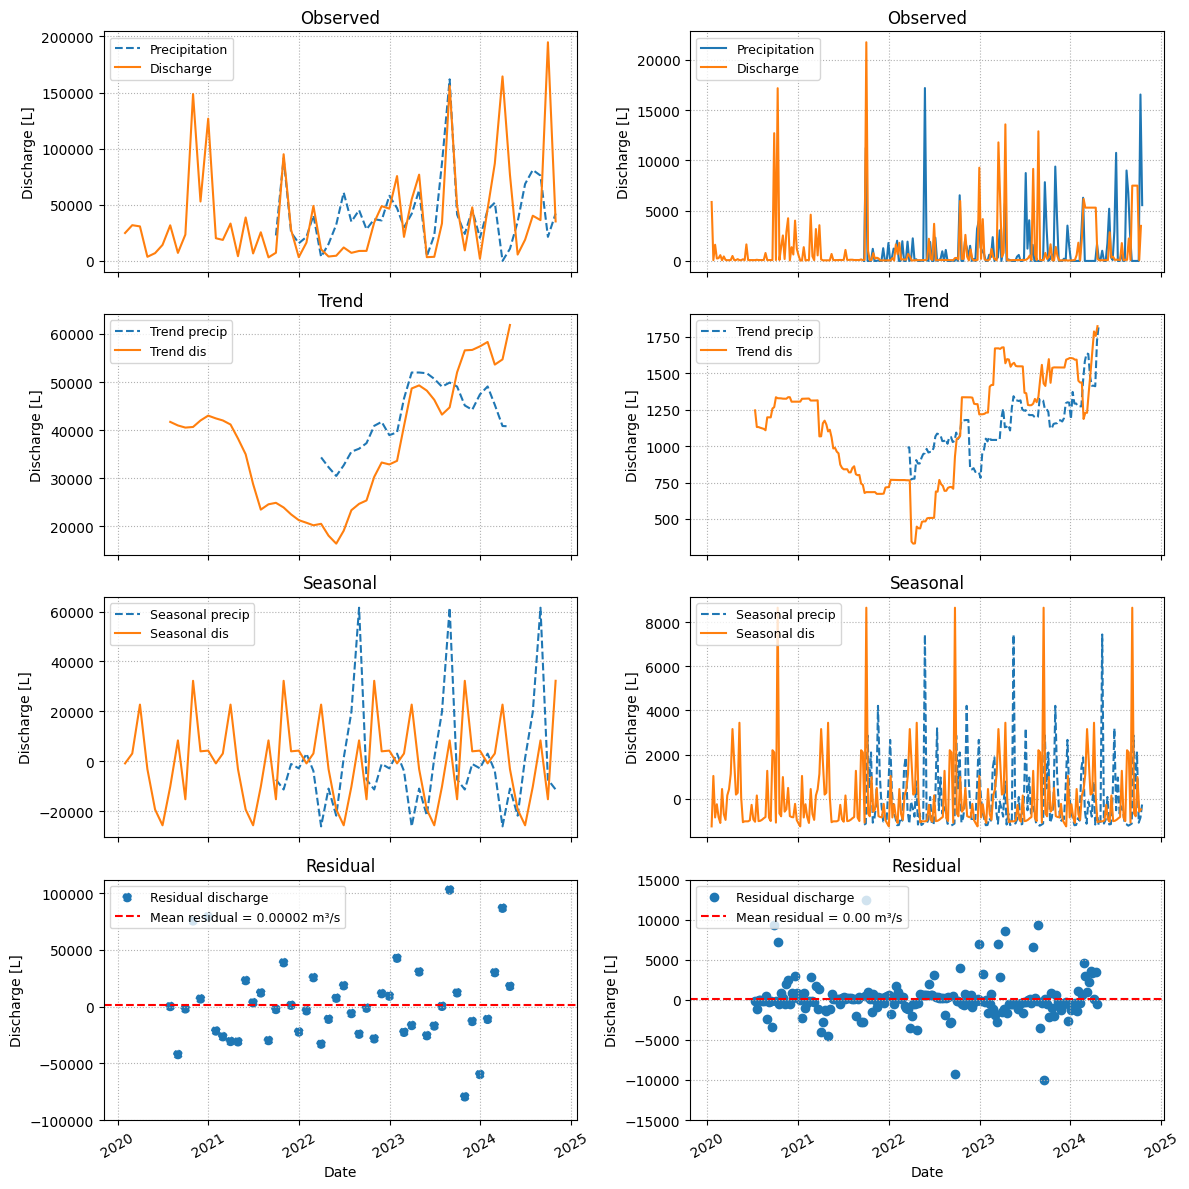

In [37]:
seasonal_dis_month = seasonal_decompose(discharge_data_month['Discharge (m³/s)'], model='additive', period=12)
seasonal_prec_month = seasonal_decompose(precip_data_month['Precipitation (mm)'], model='additive', period=12)

seasonal_dis_week = seasonal_decompose(discharge_data_week['Discharge (m³/s)'], model='additive', period=51)
seasonal_prec_week = seasonal_decompose(precip_data_week['Precipitation (mm)'], model='additive', period=51)

fig, ax = plt.subplots(4, 2, figsize=(12, 12), sharex='col')

# _____Monthly data_____
observed_prec = seasonal_prec_month.observed
trend_prec = seasonal_prec_month.trend
seasonal_prec = seasonal_prec_month.seasonal
#resid_prec = seasonal_prec.resid

observed = seasonal_dis_month.observed
trend = seasonal_dis_month.trend
seasonal = seasonal_dis_month.seasonal
resid = seasonal_dis_month.resid

# _____Weekly data_____
observed_prec_week = seasonal_prec_week.observed
trend_prec_week = seasonal_prec_week.trend
seasonal_prec_week = seasonal_prec_week.seasonal
#resid_prec_week = seasonal_prec_week.resid

observed_week = seasonal_dis_week.observed
trend_week = seasonal_dis_week.trend
seasonal_week = seasonal_dis_week.seasonal
resid_week = seasonal_dis_week.resid

ax[0,0].plot(observed_prec, label="Precipitation", linestyle="--")
ax[0,0].plot(observed, label="Discharge")
ax[0,0].set_title("Observed")
ax[0,0].set_ylabel("Discharge [L]")
ax[0,0].set_yticks(np.arange(0, 200001, 50000))
ax[0,0].legend(loc='upper left', prop={'size': 9})
ax[0,0].grid(linestyle=":")

ax[1,0].plot(trend_prec, label="Trend precip", linestyle="--")
ax[1,0].plot(trend, label="Trend dis")
ax[1,0].set_title("Trend")
ax[1,0].set_ylabel("Discharge [L]")
ax[1,0].legend(loc='upper left', prop={'size': 9})
ax[1,0].grid(linestyle=":")

ax[2,0].plot(seasonal_prec, label="Seasonal precip", linestyle="--")
ax[2,0].plot(seasonal, label="Seasonal dis")
ax[2,0].set_title("Seasonal")
ax[2,0].set_ylabel("Discharge [L]")
ax[2,0].legend(loc='upper left', prop={'size': 9})
ax[2,0].grid(linestyle=":")

mean_res = resid.mean()
real_res_mean = mean_res / (1000 * 60*60*24)
ax[3,0].scatter(resid.index, resid, label="Residual discharge", linestyle="--")
#ax[3].axhline(0, color='black', linestyle='--')
ax[3,0].axhline(mean_res, color='red', linestyle='--', label=f"Mean residual = {real_res_mean:.5f} m³/s")
ax[3,0].set_title("Residual")
ax[3,0].set_xlabel("Date")
ax[3,0].set_ylabel("Discharge [L]")
ax[3,0].tick_params(axis='x', rotation=30)
ax[3,0].set_yticks(np.arange(-100000, 100001, 50000))
ax[3,0].legend(loc='upper left', prop={'size': 9})
ax[3,0].grid(linestyle=":")

ax[0,1].plot(observed_prec_week, label="Precipitation")
ax[0,1].plot(observed_week, label="Discharge")
ax[0,1].set_title("Observed")
ax[0,1].set_ylabel("Discharge [L]")
ax[0,1].legend(loc='upper left', prop={'size': 9})
ax[0,1].grid(linestyle=":")
ax[0,1].set_yticks(np.arange(0, 25000, 5000))

ax[1,1].plot(trend_prec_week, label="Trend precip", linestyle="--")
ax[1,1].plot(trend_week, label="Trend dis")
ax[1,1].set_title("Trend")
ax[1,1].set_ylabel("Discharge [L]")
ax[1,1].grid(linestyle=":")
ax[1,1].legend(loc='upper left', prop={'size': 9})

ax[2,1].plot(seasonal_prec_week, label="Seasonal precip", linestyle="--")
ax[2,1].plot(seasonal_week, label="Seasonal dis")
ax[2,1].set_title("Seasonal")
ax[2,1].set_ylabel("Discharge [L]")
ax[2,1].grid(linestyle=":")
ax[2,1].legend(loc='upper left', prop={'size': 9})

mean_res_week = resid_week.mean()
real_res_mean_week = mean_res_week / (1000 * 60*60*24)
ax[3,1].scatter(resid_week.index, resid_week, label="Residual discharge")
#ax[3].axhline(0, color='black', linestyle='--')
ax[3,1].axhline(mean_res_week, color='red', linestyle='--', label=f"Mean residual = {real_res_mean_week:.2f} m³/s")
ax[3,1].set_title("Residual")
ax[3,1].set_xlabel("Date")
ax[3,1].set_ylabel("Discharge [L]")
ax[3,1].tick_params(axis='x', rotation=30)
ax[3,1].set_yticks(np.arange(-15000, 15001, 5000))
ax[3,1].legend(loc='upper left', prop={'size': 9})
ax[3,1].grid(linestyle=":")

plt.tight_layout()
plt.show()

- Mean almost equal to zero, or corresponding to zero which means "non biased"

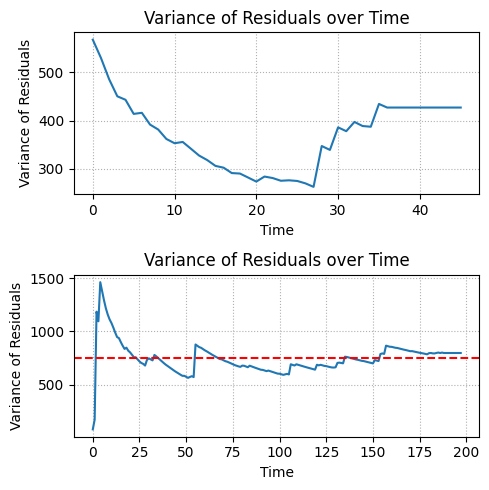

In [38]:
residuals = resid[6:-6]
mean_resid = residuals.mean()
scaled_resid = (residuals/mean_resid)

time_points = np.arange(len(scaled_resid))

variances = []
for t in time_points:
    variance = np.var(scaled_resid[:t+10])
    variances.append(variance)

week_residuals = resid_week[25:-25]
week_mean_resid = week_residuals.mean()
scaled_week_resid = (week_residuals/week_mean_resid)

time_points_week = np.arange(len(scaled_week_resid))

variances_week = []
for i in time_points_week:
    variance = np.var(scaled_week_resid[:i+10])
    variances_week.append(variance)

fig, ax = plt.subplots(2, 1, figsize=(5, 5))

# Plot variances over time
ax[0].plot(time_points, variances)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Variance of Residuals')
ax[0].set_title('Variance of Residuals over Time')
ax[0].grid(linestyle=':')

mean_variances_week = np.mean(variances_week)
ax[1].plot(time_points_week, variances_week)
ax[1].axhline(mean_variances_week, color='red', linestyle='--', label=f'Mean Variance = {mean_variances_week:.2f}')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Variance of Residuals')
ax[1].set_title('Variance of Residuals over Time')
ax[1].grid(linestyle=':')

plt.tight_layout()
plt.show()
